In [1]:
#libraries 
import pandas as pd
import gzip
from tqdm import tqdm

from datetime import datetime
from datetime import date, time
from dateutil.parser import parse
import numpy as np
import pandas as pd


from bokeh.plotting import figure, output_notebook, show,output_file,gridplot
from bokeh.models import DatetimeTickFormatter,HoverTool,Span

import json
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


In [7]:
pd.__version__

'0.21.0'

In [2]:
#load the dataframe for a given product only (is it possible?)
pickle_off = open("Electronics_meta.pickle","rb")
df = pickle.load(pickle_off)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,year,length_review,title,brand,price,sub_category_0,sub_category_1,sales_category,sales_rank
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,2013-06-02,2013,156,Rand McNally 528881469 7-inch Intelliroute TND...,NaN,299.99,Electronics,GPS & Navigation,unkown,0
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,2010-11-25,2010,446,Rand McNally 528881469 7-inch Intelliroute TND...,NaN,299.99,Electronics,GPS & Navigation,unkown,0
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,2010-09-09,2010,888,Rand McNally 528881469 7-inch Intelliroute TND...,NaN,299.99,Electronics,GPS & Navigation,unkown,0
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,2010-11-24,2010,449,Rand McNally 528881469 7-inch Intelliroute TND...,NaN,299.99,Electronics,GPS & Navigation,unkown,0
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,2011-09-29,2011,202,Rand McNally 528881469 7-inch Intelliroute TND...,NaN,299.99,Electronics,GPS & Navigation,unkown,0
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5.0,HDMI Nook adapter cable,1388707200,2014-01-03,2014,22,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,NaN,49.95,Electronics,Computers & Accessories,unkown,0
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,1398556800,2014-04-27,2014,22,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,NaN,49.95,Electronics,Computers & Accessories,unkown,0
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,1399161600,2014-05-04,2014,120,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,NaN,49.95,Electronics,Computers & Accessories,unkown,0
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,1405036800,2014-07-11,2014,88,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,NaN,49.95,Electronics,Computers & Accessories,unkown,0
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5.0,This works great but read the details...,1390176000,2014-01-20,2014,185,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,NaN,49.95,Electronics,Computers & Accessories,unkown,0


In [6]:
categories = df.groupby('sub_category_1').count()
categories['asin']

sub_category_1
Accessories                     29773
Accessories & Supplies         262983
Camera & Photo                 272938
Car & Vehicle Electronics       39772
Car Care                          196
Cases                            4461
Cell Phones                        62
Computers & Accessories        801950
Connected Devices                  41
Electronics Warranties           3078
GPS & Navigation                34102
Home Audio                      35786
Interior Accessories               20
Luggage & Travel Gear              83
Portable Audio & Video         104575
Security & Surveillance          6193
Service & Replacement Plans       494
Television & Video              77749
Tools & Equipment                 114
eBook Readers & Accessories     14818
Name: asin, dtype: int64

In [9]:
# you either run the whole category  or one particular sub_category 
df_com=df[df.sub_category_1=='Computers & Accessories']
df_cam=df[df.sub_category_1=='Camera & Photo']

# I-Product timeline

## a) From 1996 to 2014 :
**first the daily count of reviews**

In [10]:
#first the count :



** Now the daily median of the variables : rating , length of the review , length of the title **

In [3]:
def create_variables (df):
    count=df.groupby('reviewTime').count()
    count=count['asin']
#function to plot the daily mean of a given variable from 1996-2014 
    evolution = df.groupby('reviewTime').mean()
    evolution.year=list(map(lambda x:int(x) , evolution.year))
    del evolution['unixReviewTime']

#helpfulness:
    time=df.reviewTime.unique()
    tab=pd.DataFrame([],index=df.reviewTime.unique())
    l=[]
    for date in tab.index:
        data=df[df.reviewTime==date].helpful
        helpful=sum(map(lambda x:x[0],data))
        total=sum(map(lambda x:x[1],data))
        if total == 0 :
            l.append(0)
        else:
            l.append(round(helpful/total,2))

    tab['helpfulness']=l
    evolution=pd.concat([evolution,tab],axis=1)
#add count
    evolution=pd.concat([evolution,count],axis=1)
    return evolution

In [11]:
ev_com = create_variables(df_com)
ev_cam=create_variables(df_cam)

In [4]:
ev =create_variables(df)

## Daily average 

In [21]:
def timeline(evolution,variable):
    output_notebook()
    hover=HoverTool(tooltips=[
        ( 'Year',   '@year'           ),
        ( str(variable),  '@'+str(variable) ), 
        ( 'Number of reviews', '@asin'      ),],)
    p = figure(width=1000, height=500, x_axis_type="datetime",tools=[hover,'pan','wheel_zoom','box_zoom','reset'])
    # moving average over 30 days
    avg=evolution[variable].rolling(30,center=True).mean()
    
    p.line(evolution.index.values,variable,source=evolution,color='red',alpha=0.4)
    p.line(evolution.index.values,avg, color='red')
    p.title.text = "Daily mean"+str(variable)
    p.legend.location = "top_left"
    p.grid.grid_line_alpha=0
    p.xaxis.axis_label = 'Date'
    p.yaxis.axis_label = str(variable)
    p.xaxis[0].formatter = DatetimeTickFormatter(days='%m/%d',years='%Y',months='%B')
    return p

In [23]:
p=timeline(ev_com,'asin')
show(p)


Loading BokehJS ...

/Users/sonia/anaconda/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)


In [37]:
hover=''
colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
p = figure(width=1000, height=500, x_axis_type="datetime",tools=[hover,'pan','wheel_zoom','box_zoom','reset'])
    
def compare_timeline(p,ev,variable,category,c='navy'):
    avg=ev[variable].rolling(15,center=True).mean() # moving average to have something smoother
    #hover=HoverTool(tooltips=[( 'Year',   '@year'),( category,  '@'+str(variable) ),],)
    p.line(ev.index.values,avg,color=c)
    p.xaxis[0].formatter = DatetimeTickFormatter(days='%m/%d',years='%Y',months='%B')
    return p

#p.title.text = "comparison of "+str(variable)+" between "+category1+" and "+category2
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'

p=compare_timeline(p,ev_com,'asin','computers','#a6cee3')
p=compare_timeline(p,ev_cam,'asin','cameras','#1f78b4')
show(p)

##  Monthly Average for all years 

compute the monthly average of given variable

In [38]:
from pandas.core import datetools

/Users/sonia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  """Entry point for launching an IPython kernel.


In [46]:
#monthly average 
def monthly_mean(evolution):
    r =evolution.resample('M')
    monthly_mean =r.median()
    return monthly_mean

def monthly_std(evolution):
    r =evolution.resample('M')
    monthly_std=r.std()
    return monthly_std


In [47]:
mean_com=monthly_mean(ev_com)
std_com=monthly_std(ev_com)

mean_cam=monthly_mean(ev_cam)
std_cam=monthly_std(ev_cam)

In [50]:
def monthly_timeline(mean,std,variable):
    moving_avg = mean[variable].rolling(6,center=True).mean()
    
    p = figure(width=1000, height=500, x_axis_type="datetime")
    p.circle(mean.index,mean[variable],alpha=0.7)
    p.line(mean.index,moving_avg, color='#e34a33')
    p.line(mean.index,mean[variable]+std[variable], color='#7fcdbb')
    p.line(mean.index,mean[variable]-std[variable], color='#7fcdbb')
    return p
p=monthly_timeline(mean_cam,std_cam,'length_review')
p2=monthly_timeline(mean_com,std_com,'length_review')
show(p)
show(p2)


## b) variation % average By year :

In [ ]:
variable='asin'
years=set(evolution.year)

In [56]:
def variation_year (ev,variable,year):
    data=ev.rolling(15,center=True).median()
    data=data[round(data.year)==year]
    avg= data[variable].median()
    output_notebook()
    M=round(max(data[variable]))+3
    m=round(min(data[variable]))-3
    plot = figure(plot_width=1000, plot_height=500,y_range=[m,M],x_axis_type="datetime")
    plot.vbar(x=data.index, width=1, bottom=avg, top=data[variable], color="red")
    average = Span(location=avg,dimension='width', line_color='navy', line_width=1)
    plot.title.text=str(year)
    plot.legend.location = "top_left"
    plot.grid.grid_line_alpha=0.6
    plot.xaxis.axis_label = 'Date'
    plot.xaxis[0].formatter = DatetimeTickFormatter(months='%d%B')
    plot.renderers.extend([average])
    return plot
p=variation_year(ev_com,'asin',2013)
p2=variation_year(ev_cam,'asin',2013)
show(p)
show(p2)

Loading BokehJS ...

Loading BokehJS ...

## c) analysis of the time series 

# II-Product Characteristics

In [59]:
df_com.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,year,length_review,title,brand,price,sub_category_0,sub_category_1,sales_category,sales_rank
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5.0,HDMI Nook adapter cable,1388707200,2014-01-03,2014,22,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,NaN,49.95,Electronics,Computers & Accessories,unkown,0


## a) Summary

In [76]:

def information_category(df,category,info):
    info.loc[category,'number_products']=len(set(df.asin))
    info.loc[category,'number_of_reviews']=len(df.asin)
    info.loc[category,'number_of_reviewers']=len(set(df.reviewerID)) 
    info.loc[category,'first_review']=min(df.reviewTime)
    info.loc[category,'last_review']=max(df.reviewTime)
    return info 
    

In [82]:
info=pd.DataFrame([])
info=information_category(df_com,'Computers',info)
info=information_category(df_cam,'Cameras',info)
info

,number_products,number_of_reviews,number_of_reviewers,first_review,last_review
Computers,27333.0,801950.0,178500.0,1999-07-05,2014-07-23
Cameras,12391.0,272938.0,89800.0,1999-07-23,2014-07-23


In [107]:
prod_com=df_com.groupby('asin').median()
del prod_com['unixReviewTime']

prod_cam=df_cam.groupby('asin').median()
del prod_cam['unixReviewTime']

In [105]:
prod_com.head()

,overall,year,length_review,price,sales_rank
asin,,,,,
0594451647,5.0,2014.0,88.0,49.95,0.0
1400501466,5.0,2012.0,141.0,188.88,0.0
1400501520,5.0,2013.0,117.0,169.99,0.0
1400698987,5.0,2014.0,80.0,158.99,0.0
1400699169,5.0,2013.5,207.0,211.75,6486.0


/Users/sonia/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


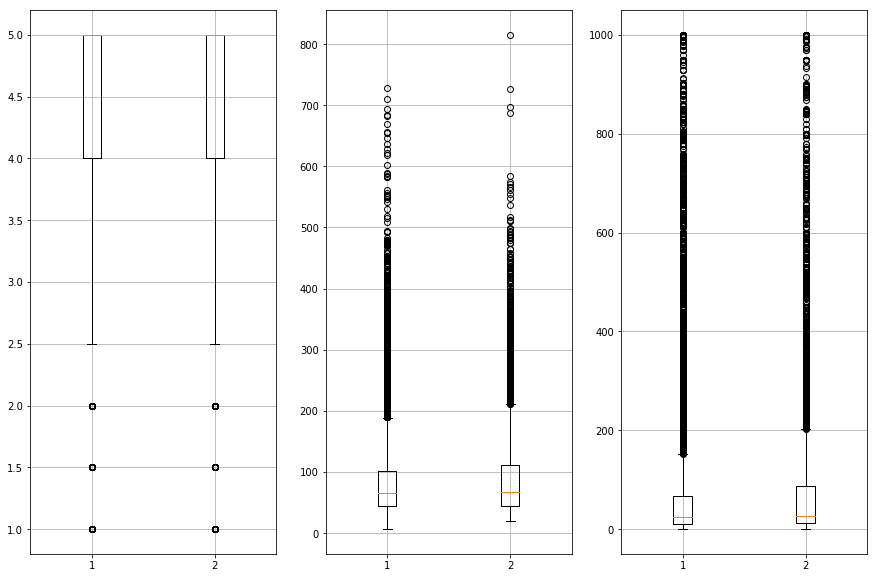

In [120]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.boxplot([prod_com['overall'],prod_cam['overall']])
plt.grid()
plt.subplot(1,3,2)
plt.boxplot([prod_com['length_review'],prod_cam['length_review']])
plt.grid()
plt.subplot(1,3,3)
plt.boxplot([prod_com['price'].dropna(),prod_cam['price'].dropna()])
plt.grid()
plt.show()

/Users/sonia/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


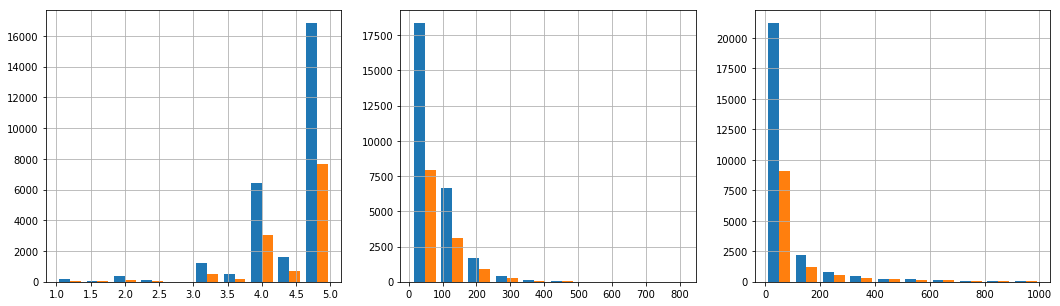

In [124]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.hist([prod_com['overall'],prod_cam['overall']])
plt.grid()
plt.subplot(1,3,2)
plt.hist([prod_com['length_review'],prod_cam['length_review']])
plt.grid()
plt.subplot(1,3,3)
plt.hist([prod_com['price'].dropna(),prod_cam['price'].dropna()])
plt.grid()
plt.show()

## b) Correlations between different characteristics of the product :

In [132]:
def corr (p,ev,x,y,c):
    p.circle(ev[x],ev[y],alpha=0.5)
    p.circle(ev[x],ev[y],color=c,alpha=0.5)
    p.legend.location = "top_left"
    p.grid.grid_line_alpha=0
    p.xaxis.axis_label = x
    p.yaxis.axis_label = y
    return p


In [133]:
p = figure(width=1000, height=500)
p=corr(p,ev_com,'overall','helpfulness','#1f78b4')
p=corr(p,ev_cam,'overall','helpfulness','#fb9a99')
show(p)

In [134]:
p = figure(width=1000, height=500)
p=corr(p,ev_com,'overall','length_review','#1f78b4')
p=corr(p,ev_cam,'overall','length_review','#fb9a99')
show(p)


In [135]:
p = figure(width=1000, height=500)
p=corr(p,ev_com,'helpfulness','length_review','#1f78b4')
p=corr(p,ev_cam,'helpfulness','length_review','#fb9a99')
show(p)

In [136]:
#sentiment and the 3 above 


In [9]:
len(set(df.asin))

63001

In [10]:
len(set(df.reviewTime))

5277

In [5]:
category= set(df.sub_category_1)
date=set(df.reviewTime)

In [33]:
D=df.groupby(['reviewTime','sub_category_1']).count()
concat=pd.DataFrame(D.asin)
for i in concat.index:
    data=df.loc[(df.reviewTime==i[0])&(df.sub_category_1==i[1])]
    concat.loc[i,'text']='.'.join(list(data.reviewText))
        

KeyboardInterrupt: 

In [34]:
concat

asin  \
reviewTime sub_category_1                      
1999-06-13 Portable Audio & Video          1   
1999-07-05 Computers & Accessories         1   
1999-07-08 Television & Video              1   
1999-07-23 Camera & Photo                  1   
           Television & Video              1   
1999-08-21 Computers & Accessories         1   
1999-08-22 Camera & Photo                  1   
1999-09-02 Television & Video              1   
1999-09-10 Television & Video              1   
1999-10-10 Computers & Accessories         1   
1999-10-11 Computers & Accessories         1   
1999-10-13 Television & Video              1   
1999-10-17 Computers & Accessories         1   
1999-10-20 Camera & Photo                  1   
1999-10-24 Television & Video              1   
1999-10-25 Television & Video              1   
1999-10-26 Camera & Photo                  1   
1999-10-27 Television & Video              1   
1999-11-02 Computers & Accessories         1   
1999-11-03 Camera & Photo                  1   
1999-11-04 Camera & Photo                  1   
1999-11-05 Television & Video              1   
1999-11-12 Television & Video              1   
1999-11-13 Camera & Photo                  1   
1999-11-15 Camera & Photo                  1   
1999-11-17 Portable Audio & Video          1   
           Television & Video              1   
1999-11-22 Camera & Photo                  1   
1999-11-23 Camera & Photo                  1   
           Computers & Accessories         1   
...                                      ...   
2014-07-21 Cases                           4   
           Computers & Accessories       379   
           Electronics Warranties          1   
           GPS & Navigation                7   
           Home Audio                     21   
           Portable Audio & Video         32   
           Security & Surveillance         1   
           Television & Video             32   
           eBook Readers & Accessories     8   
2014-07-22 Accessories                    29   
           Accessories & Supplies         33   
           Camera & Photo                 60   
           Car & Vehicle Electronics      11   
           Cases                           1   
           Computers & Accessories       309   
           GPS & Navigation                5   
           Home Audio                     17   
           Portable Audio & Video         18   
           Security & Surveillance         2   
           Television & Video             21   
           eBook Readers & Accessories     4   
2014-07-23 Accessories                     1   
           Accessories & Supplies          6   
           Camera & Photo                 10   
           Car & Vehicle Electronics       1   
           Computers & Accessories        32   
           Home Audio                      2   
           Portable Audio & Video          1   
           Television & Video              4   
           eBook Readers & Accessories     1   

                                                                                     text  
reviewTime sub_category_1                                                                  
1999-06-13 Portable Audio & Video       The RIO rocks! It is so great that Diamond Mul...  
1999-07-05 Computers & Accessories      I have found a few places that will do memory ...  
1999-07-08 Television & Video           I love this player! I travel frequently and th...  
1999-07-23 Camera & Photo               If you are looking for the best camcorder in t...  
           Television & Video           The &quot;lip-synch&quot; problem has shown up...  
1999-08-21 Computers & Accessories      Since I was out of internal bays and I still n...  
1999-08-22 Camera & Photo               Like the previous reviewer, I also purchased t...  
1999-09-02 Television & Video           Otherwise very good - Never tested limits of t...  
1999-09-10 Television & Video           This is my first DVD after thinking about it f...  
199

In [32]:
concat.index[0][0]

Timestamp('1999-06-13 00:00:00')